In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import norm
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
import warnings
from sklearn.model_selection import GridSearchCV
from numpy import asarray
from sklearn.datasets import make_regression

### Loading Saved Variables

In [2]:
common_dir=r"D:\Hemanth Engineering\Assignments\6th Sem\Mini Proj\Final\Removal"
X_train_scaled=np.load(fr"{common_dir}\X_train_scaled.npy")
X_test_scaled=np.load(fr"{common_dir}\X_test_scaled.npy")
X_train=np.load(fr"{common_dir}\x_train.npy")
X_test=np.load(fr"{common_dir}\x_test.npy")
y_test=np.load(fr"{common_dir}\y_test.npy")
y_train=np.load(fr"{common_dir}\y_train.npy")
transformed_data_nparray=np.load(fr"{common_dir}\transformed_data.npy")


In [3]:
column_names=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'Benzene', 'Toluene', 'Ozone', 'RH', 'Xylene',  'AT',
       'RF', 'WS', 'WD', 'Temp', 'SR', 'AQI']
transformed_data=pd.DataFrame(transformed_data_nparray,columns=column_names)

In [4]:
X = transformed_data.drop(columns=['AQI'])
y = transformed_data['AQI']
y

0       4.890349
1       4.779124
2       4.804021
3       4.787492
4       4.844187
          ...   
1946    3.828641
1947    4.094345
1948    4.025352
1949    4.204693
1950    4.382027
Name: AQI, Length: 1951, dtype: float64

In [5]:
modelss = {
    "Random_Forest_Regressor": RandomForestRegressor(n_estimators=100, max_depth=15, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42),
    "Bagging_Regressor": BaggingRegressor(n_estimators=300, max_samples=0.9, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, num_leaves=61),
    "CatBoost": CatBoostRegressor(iterations=100, depth=10, learning_rate=0.1, random_state=42, verbose=0),
    "XGBRFRegressor": XGBRFRegressor(n_estimators=100, max_depth=15, subsample=0.9, colsample_bynode=0.2, random_state=42)

}


In [6]:
# Bagging Regressor parameter grid
bagging_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': [0.5, 0.7, 0.9]
}

# LGBM Regressor parameter grid
lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'num_leaves': [31, 61, 121]
}

# XGBoost Regressor parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'learning_rate': [0.1, 0.01]
}

# CatBoost Regressor parameter grid
catboost_param_grid = {
    'iterations': [100, 200],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.5]
}

# XGBRF Regressor parameter grid
xgbrf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'subsample': [0.8, 0.9],
    'colsample_bynode': [0.2, 0.3]
}


In [7]:
# GridSearchCV for Bagging Regressor
bagging_grid_search = GridSearchCV(estimator=modelss["Bagging_Regressor"], param_grid=bagging_param_grid, cv=5, n_jobs=-1)

# GridSearchCV for LGBM Regressor
lgbm_grid_search = GridSearchCV(estimator=modelss["LightGBM"], param_grid=lgbm_param_grid, cv=5, n_jobs=-1)

# GridSearchCV for XGBoost Regressor
xgb_grid_search = GridSearchCV(estimator=modelss["XGBoost"], param_grid=xgb_param_grid, cv=5, n_jobs=-1)

# GridSearchCV for CatBoost Regressor
catboost_grid_search = GridSearchCV(estimator=modelss["CatBoost"], param_grid=catboost_param_grid, cv=5, n_jobs=-1)

# GridSearchCV for XGBRF Regressor
xgbrf_grid_search = GridSearchCV(estimator=modelss["XGBRFRegressor"], param_grid=xgbrf_param_grid, cv=5, n_jobs=-1)


In [8]:
# Fit GridSearchCV for Bagging Regressor
bagging_grid_search.fit(X, y)

# Fit GridSearchCV for LGBM Regressor
lgbm_grid_search.fit(X, y)

# Fit GridSearchCV for XGBoost Regressor
xgb_grid_search.fit(X, y)

# Fit GridSearchCV for CatBoost Regressor
catboost_grid_search.fit(X, y)



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4282
[LightGBM] [Info] Number of data points in the train set: 1951, number of used features: 19
[LightGBM] [Info] Start training from score 4.127618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=0.2,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_ca...
                                      max_delta_step=None, max_depth=15,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
       

In [94]:

# Fit GridSearchCV for XGBRF Regressor
xgbrf_grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=0.2,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_ca...
                                      max_delta_step=None, max_depth=15,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
       

In [9]:
# Best parameters and best estimator for Bagging Regressor
best_params_bagging = bagging_grid_search.best_params_
best_estimator_bagging = bagging_grid_search.best_estimator_

# Best parameters and best estimator for LGBM Regressor
best_params_lgbm = lgbm_grid_search.best_params_
best_estimator_lgbm = lgbm_grid_search.best_estimator_

# Best parameters and best estimator for XGBoost Regressor
best_params_xgb = xgb_grid_search.best_params_
best_estimator_xgb = xgb_grid_search.best_estimator_

# Best parameters and best estimator for CatBoost Regressor
best_params_catboost = catboost_grid_search.best_params_
best_estimator_catboost = catboost_grid_search.best_estimator_

# Best parameters and best estimator for XGBRF Regressor
best_params_xgbrf = xgbrf_grid_search.best_params_
best_estimator_xgbrf = xgbrf_grid_search.best_estimator_



# Best Hyper Parameters

In [10]:
[best_params_bagging,best_params_lgbm,best_params_xgb,best_params_catboost,best_params_xgbrf]

[{'max_samples': 0.9, 'n_estimators': 300},
 {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'num_leaves': 31},
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100},
 {'depth': 6, 'iterations': 200, 'learning_rate': 0.1},
 {'colsample_bynode': 0.3,
  'max_depth': 10,
  'n_estimators': 200,
  'subsample': 0.8}]

In [72]:
models = {
    "Random_Forest_Regressor": RandomForestRegressor(n_estimators=100, max_depth=15, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=best_params_xgb['n_estimators'], max_depth=best_params_xgb['max_depth'], learning_rate=best_params_xgb['learning_rate'], random_state=42),
    "Bagging_Regressor": BaggingRegressor(n_estimators=best_params_bagging['n_estimators'], max_samples=best_params_bagging['max_samples'], random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=best_params_lgbm['n_estimators'], max_depth=best_params_lgbm['max_depth'], learning_rate=best_params_lgbm['learning_rate'], num_leaves=61),
    "CatBoost": CatBoostRegressor(iterations=best_params_catboost['iterations'], depth=best_params_catboost['depth'], learning_rate=best_params_catboost['learning_rate'], verbose=100, random_state=42),
#     "XGBRFRegressor": XGBRFRegressor(n_estimators=best_params_xgbrf['n_estimators'], max_depth=best_params_xgbrf['max_depth'], learning_rate=best_params_xgbrf['learning_rate'], subsample=best_params_xgbrf['subsample'], colsample_bynode=best_params_xgbrf['colsample_bynode'], random_state=42)
        "XGBRFRegressor": XGBRFRegressor(n_estimators=100, max_depth=15, subsample=0.9, colsample_bynode=0.2, random_state=42)

}


# Random Forest Regressor

In [73]:
#  model: # defined hyperparameters are 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, and 'n_estimators': 100.
randFor = models["Random_Forest_Regressor"]
# Fitting the model
randFor.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, random_state=42)

In [74]:
#score Calculation - R-squared or R2
randFor.score(X_train,y_train) * 100

98.53101129711048

In [75]:
#train
y_pred_train=randFor.predict(X_train)
# Predict on test set
y_pred = randFor.predict(X_test)

In [76]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.03093197952637276


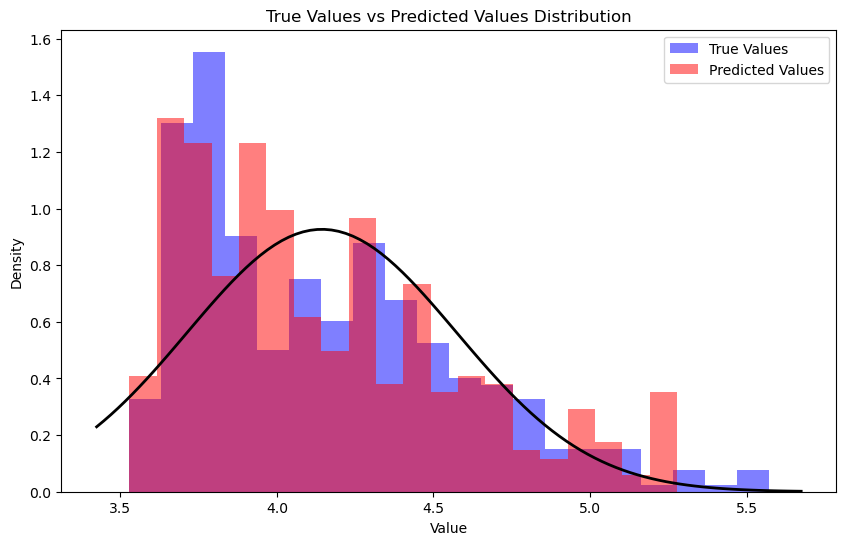

In [77]:
# Plotting the normal distribution of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, density=True, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred, bins=20, density=True, alpha=0.5, color='red', label='Predicted Values')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(y_pred), np.std(y_pred))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('True Values vs Predicted Values Distribution')
plt.legend()
plt.show()

# XGBoost Regressor

In [78]:
xgb_model = models["XGBoost"]
# Fitting the model
xgb_model.fit(X_train, y_train)
#score Calculation - R-squared or R2
xgb_model.score(X_train,y_train) * 100

97.95399931409179

In [79]:
#train
y_pred_train_xgb=xgb_model.predict(X_train)
# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

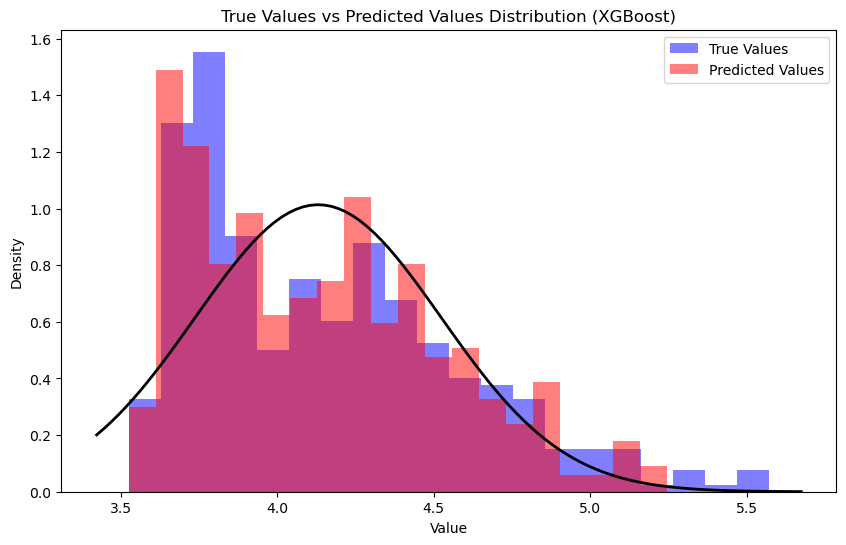

In [80]:
# Plotting the normal distribution of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, density=True, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred_xgb, bins=20, density=True, alpha=0.5, color='red', label='Predicted Values')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(y_pred_xgb), np.std(y_pred_xgb))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('True Values vs Predicted Values Distribution (XGBoost)')
plt.legend()
plt.show()

# Bagging Regressor

In [81]:
bagging_model=models["Bagging_Regressor"]
#fitting model
bagging_model.fit(X_train, y_train)
#score Calculation - R-squared or R2
r2_train = bagging_model.score(X_train, y_train) * 100

In [82]:
print(r2_train)

98.438333015047


In [55]:
#train
y_pred_train_bgr=bagging_model.predict(X_train)
# Predict on test set
y_pred_bgr = bagging_model.predict(X_test)

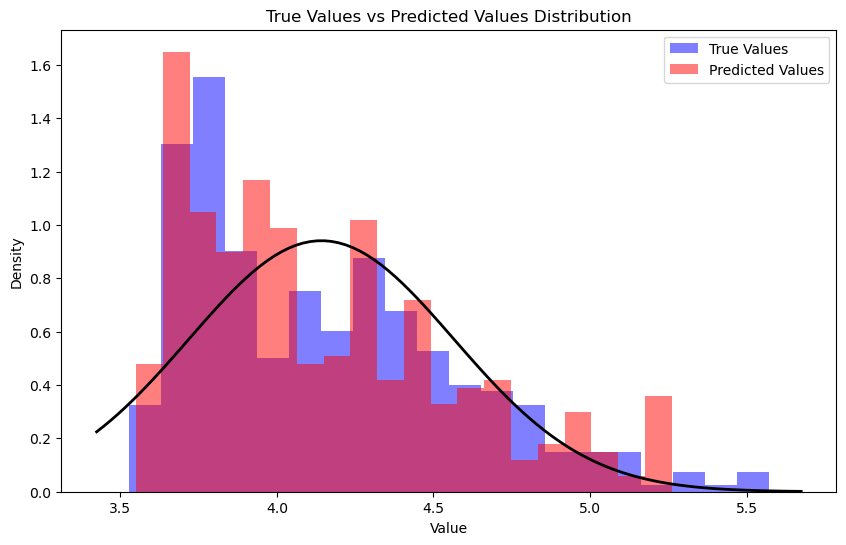

In [56]:
# Plotting the normal distribution of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, density=True, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred_bgr, bins=20, density=True, alpha=0.5, color='red', label='Predicted Values')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(y_pred_bgr), np.std(y_pred_bgr))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('True Values vs Predicted Values Distribution')
plt.legend()
plt.show()

# LGBM Regressor

In [57]:
# Ignore LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")

In [58]:
lgbm=models["LightGBM"]
# Fitting the model
lgbm.fit(X_train, y_train)
# Calculating R-squared score
# r2_score = lgbm.score(X_train, y_train) * 100

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4177
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 19
[LightGBM] [Info] Start training from score 4.121708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMRegressor(max_depth=7, n_estimators=50, num_leaves=61)

In [59]:
#train
y_pred_train_lgbm=lgbm.predict(X_train)
# Predict on test set
y_pred_lgbm = lgbm.predict(X_test)
# Calculate mean squared error
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

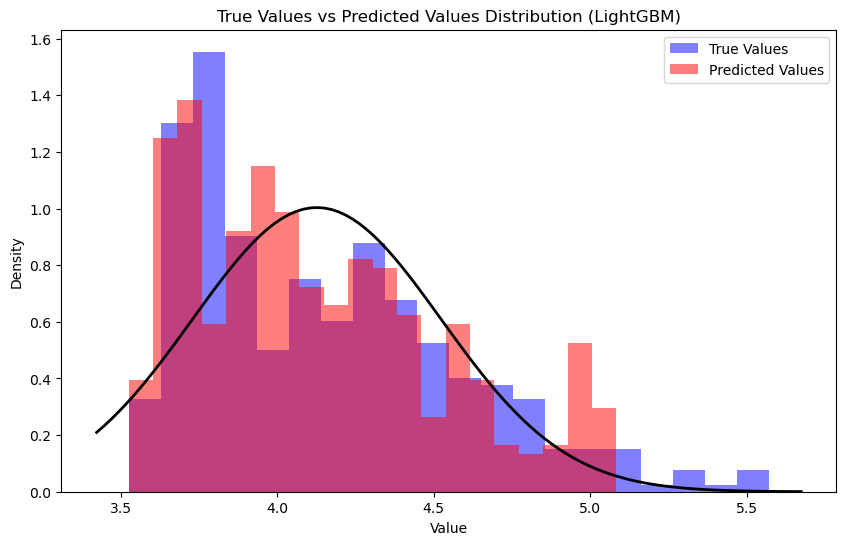

In [60]:
# Plotting the normal distribution of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, density=True, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred_lgbm, bins=20, density=True, alpha=0.5, color='red', label='Predicted Values')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(y_pred_lgbm), np.std(y_pred_lgbm))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('True Values vs Predicted Values Distribution (LightGBM)')
plt.legend()
plt.show()


# CatBoost Regressor

In [61]:
catboost_model = models["CatBoost"]
# Fitting the model
catboost_model.fit(X_train, y_train)
#score Calculation - R-squared or R2
catboost_model.score(X_train,y_train) * 100

0:	learn: 0.4305289	total: 8.49ms	remaining: 1.69s
100:	learn: 0.1134635	total: 627ms	remaining: 614ms
199:	learn: 0.0855337	total: 1.25s	remaining: 0us


96.55855044662829

In [62]:
#train
y_pred_train_catboost=catboost_model.predict(X_train)
# Predict on test set
y_pred_catboost = catboost_model.predict(X_test)
# Calculate mean squared error
mse_catboost = mean_squared_error(y_test, y_pred_catboost)

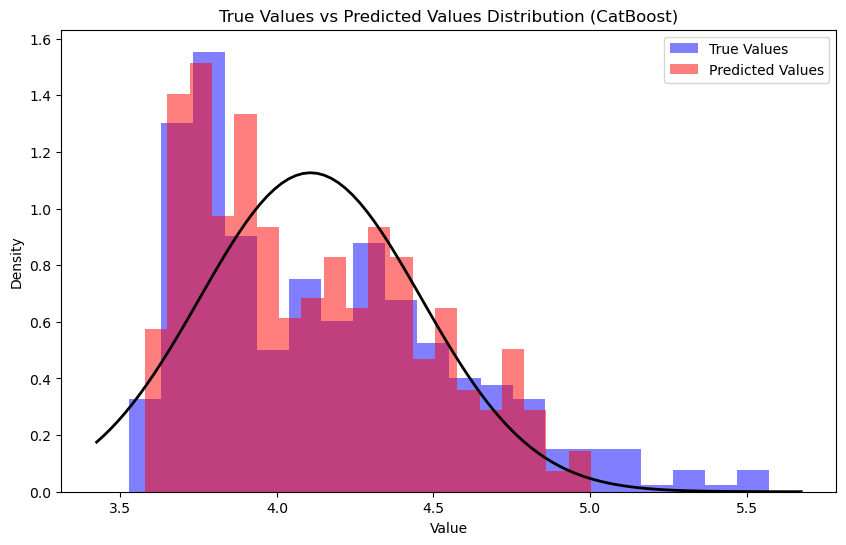

In [63]:
# CatBoost Regressor# Plotting the normal distribution of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, density=True, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred_catboost, bins=20, density=True, alpha=0.5, color='red', label='Predicted Values')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(y_pred_catboost), np.std(y_pred_catboost))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('True Values vs Predicted Values Distribution (CatBoost)')
plt.legend()
plt.show()


# XGBRF Regressor

In [89]:
xgbrf = models["XGBRFRegressor"]
# Fitting the model
xgbrf.fit(X_train, y_train)
#score Calculation - R-squared or R2
xgbrf.score(X_train,y_train) * 100

99.71574682409141

In [90]:
#train
y_pred_train_xgbrf=xgbrf.predict(X_train)
# Predict on test set
y_pred_xgbrf = xgbrf.predict(X_test)
# Calculate mean squared error
mse_xgbrf = mean_squared_error(y_test, y_pred_xgbrf)

In [91]:

r2=round(r2_score(y_test,y_pred_xgbrf),4)
print(r2)

0.7798


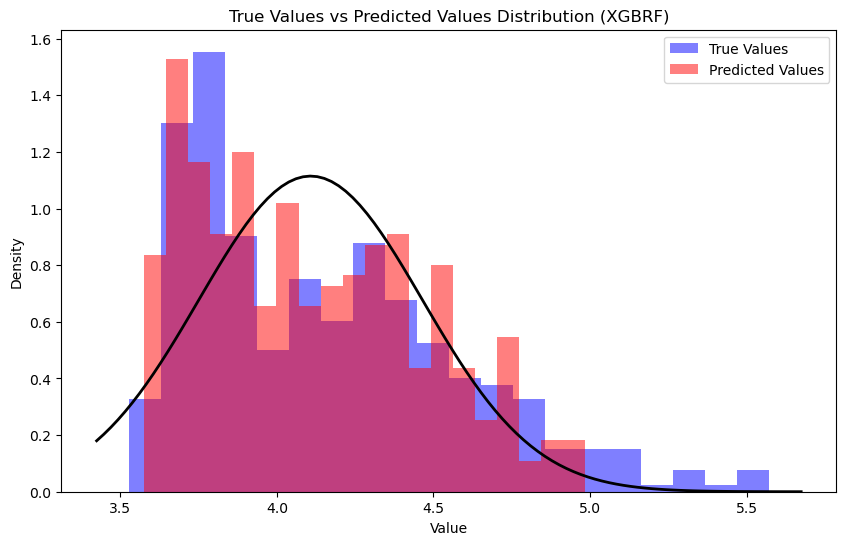

In [66]:
# XGBRF Regressor# Plotting the normal distribution of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, density=True, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred_xgbrf, bins=20, density=True, alpha=0.5, color='red', label='Predicted Values')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(y_pred_xgbrf), np.std(y_pred_xgbrf))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('True Values vs Predicted Values Distribution (XGBRF)')
plt.legend()
plt.show()


# Comparision of Truevalues vs Predicted Values

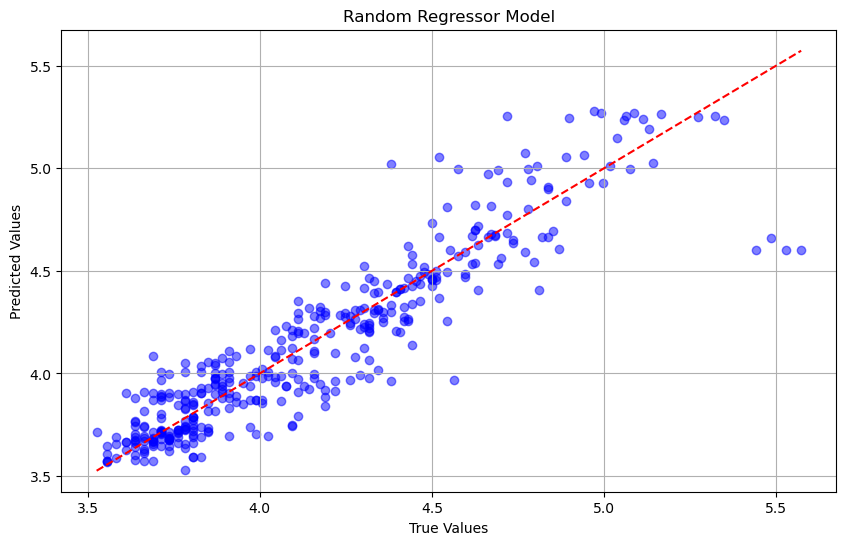

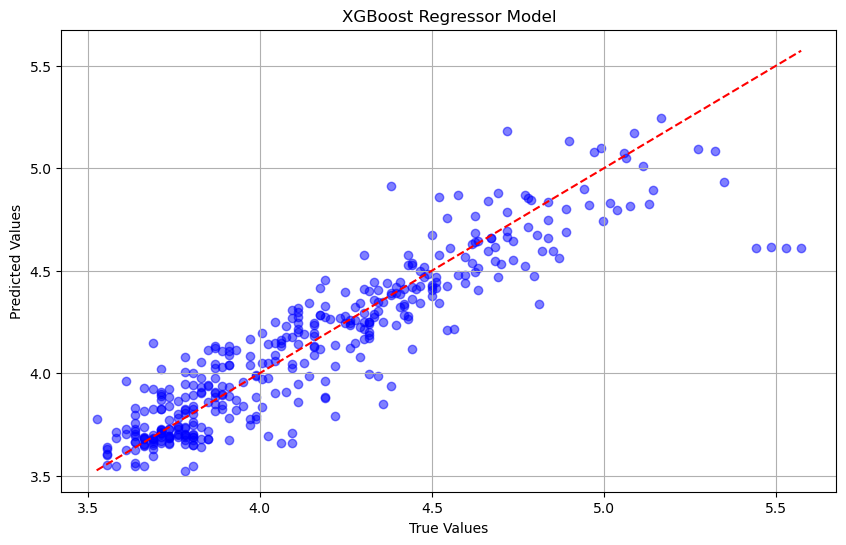

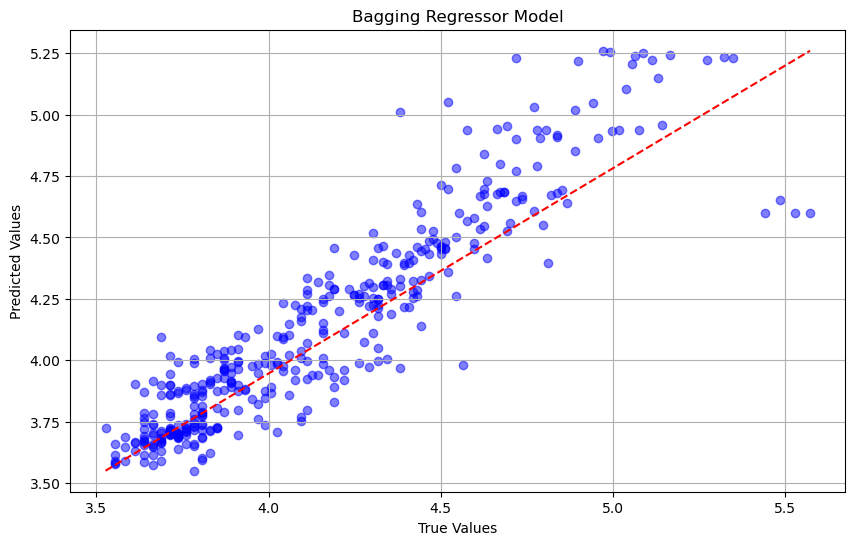

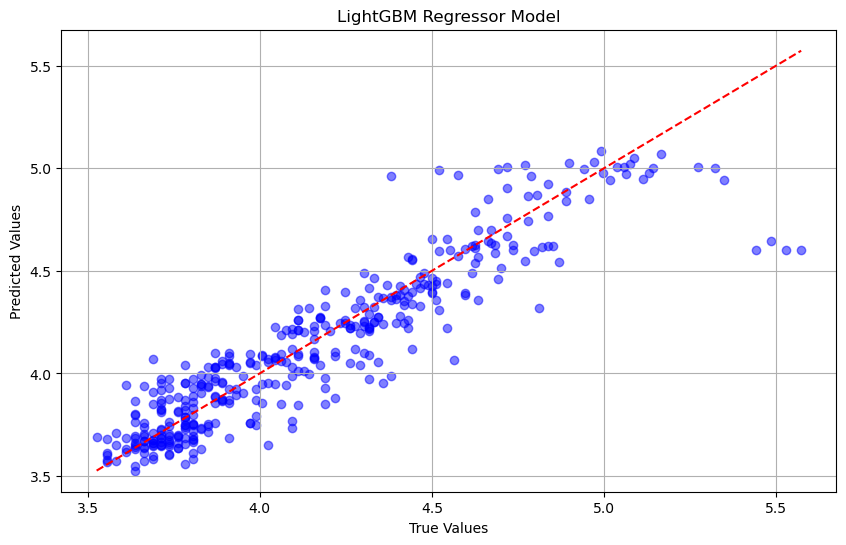

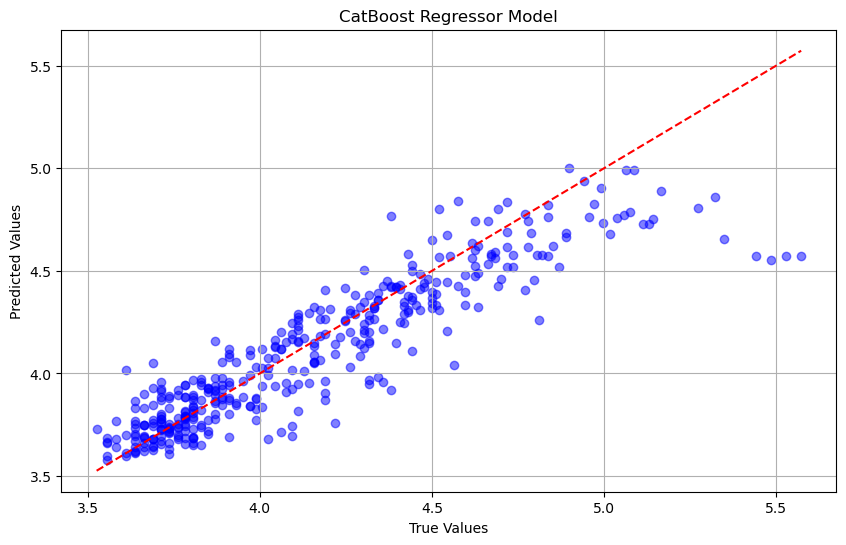

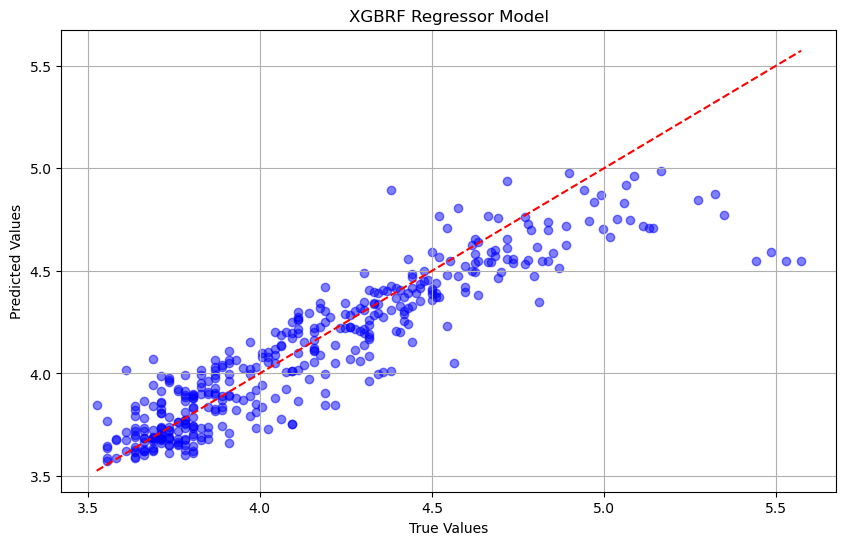

In [67]:
# Scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Regressor Model')
plt.grid(True)
plt.show()

# Scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regressor Model')
plt.grid(True)
plt.show()

# Scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bgr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_pred_bgr), max(y_pred_bgr)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Bagging Regressor Model')
plt.grid(True)
plt.show()

# Scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgbm, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('LightGBM Regressor Model')
plt.grid(True)
plt.show()

# Scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_catboost, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('CatBoost Regressor Model')
plt.grid(True)
plt.show()

# Scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgbrf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBRF Regressor Model')
plt.grid(True)
plt.show()

# Comparision of Residuals vs Predicted Values

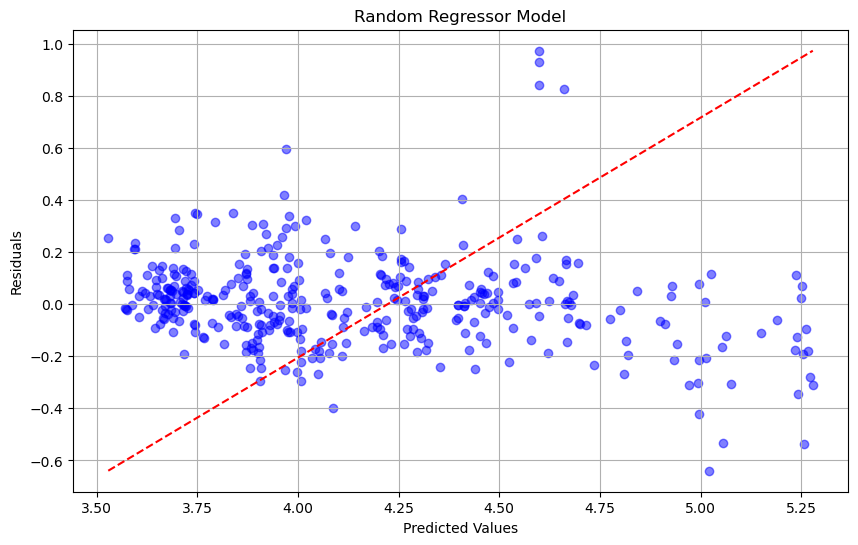

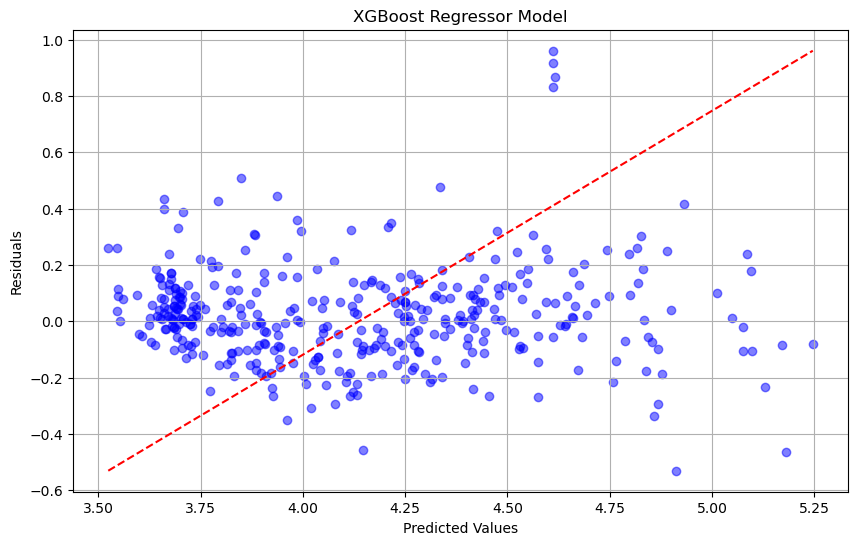

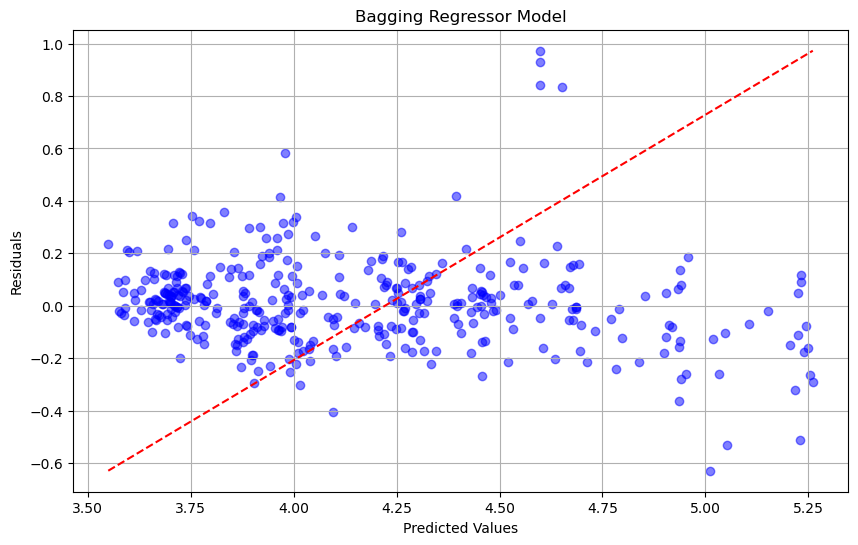

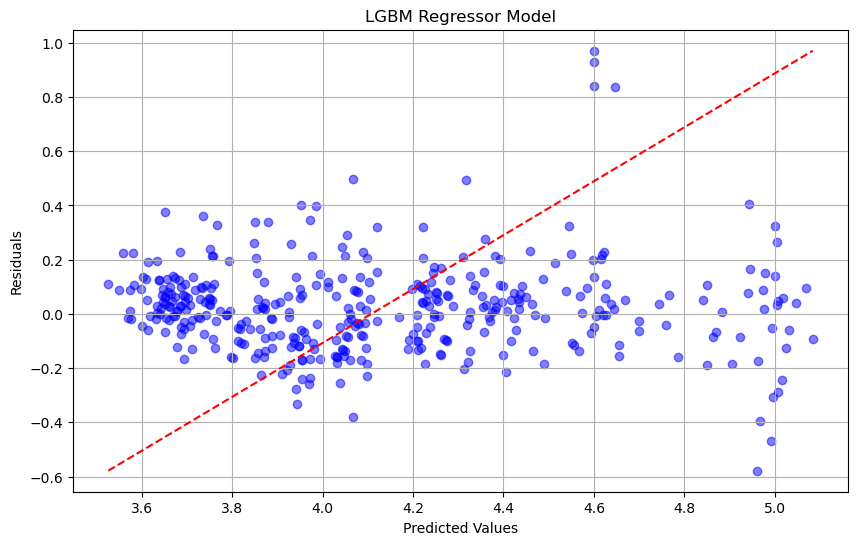

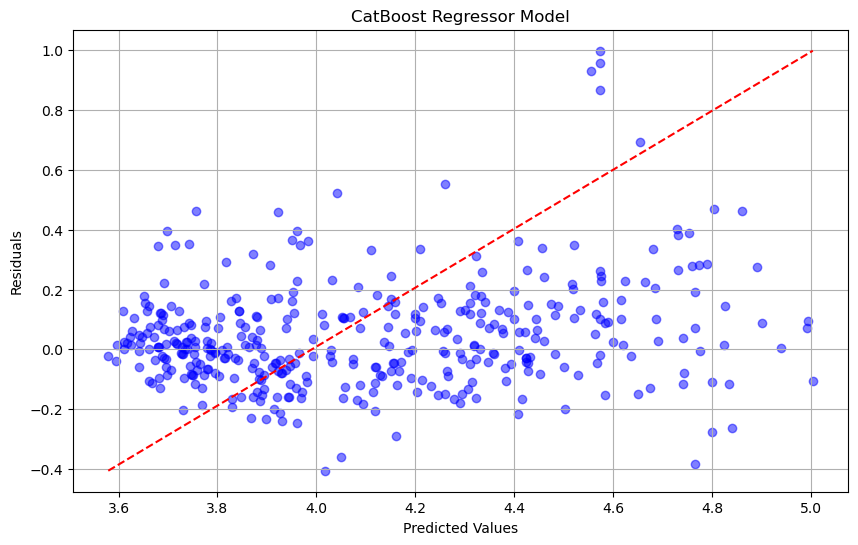

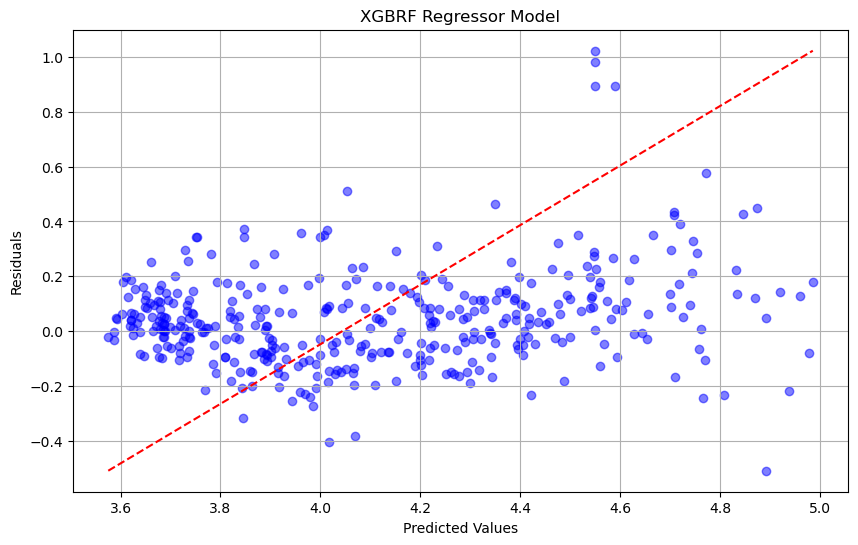

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred,y_test-y_pred , color='blue', alpha=0.5)
plt.plot([min(y_pred), max(y_pred)], [min(y_test-y_pred), max(y_test-y_pred)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Regressor Model')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb,y_test-y_pred_xgb , color='blue', alpha=0.5)
plt.plot([min(y_pred_xgb), max(y_pred_xgb)], [min(y_test-y_pred_xgb), max(y_test-y_pred_xgb)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('XGBoost Regressor Model')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_bgr,y_test-y_pred_bgr , color='blue', alpha=0.5)
plt.plot([min(y_pred_bgr), max(y_pred_bgr)], [min(y_test-y_pred_bgr), max(y_test-y_pred_bgr)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Bagging Regressor Model')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lgbm,y_test-y_pred_lgbm , color='blue', alpha=0.5)
plt.plot([min(y_pred_lgbm), max(y_pred_lgbm)], [min(y_test-y_pred_lgbm), max(y_test-y_pred_lgbm)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('LGBM Regressor Model')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_catboost,y_test-y_pred_catboost , color='blue', alpha=0.5)
plt.plot([min(y_pred_catboost), max(y_pred_catboost)], [min(y_test-y_pred_catboost), max(y_test-y_pred_catboost)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('CatBoost Regressor Model')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgbrf,y_test-y_pred_xgbrf , color='blue', alpha=0.5)
plt.plot([min(y_pred_xgbrf), max(y_pred_xgbrf)], [min(y_test-y_pred_xgbrf), max(y_test-y_pred_xgbrf)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('XGBRF Regressor Model')
plt.grid(True)
plt.show()

# Frequency Of Residuals

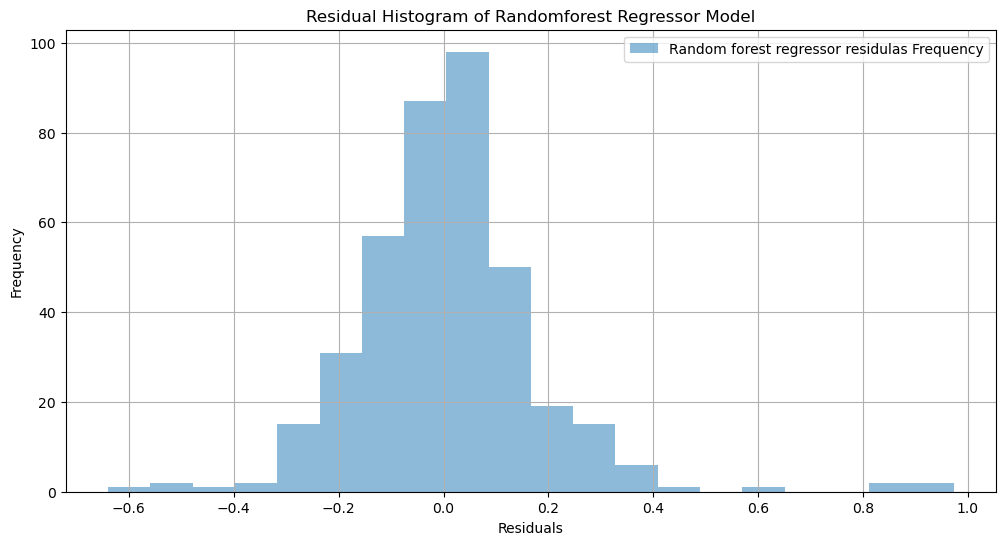

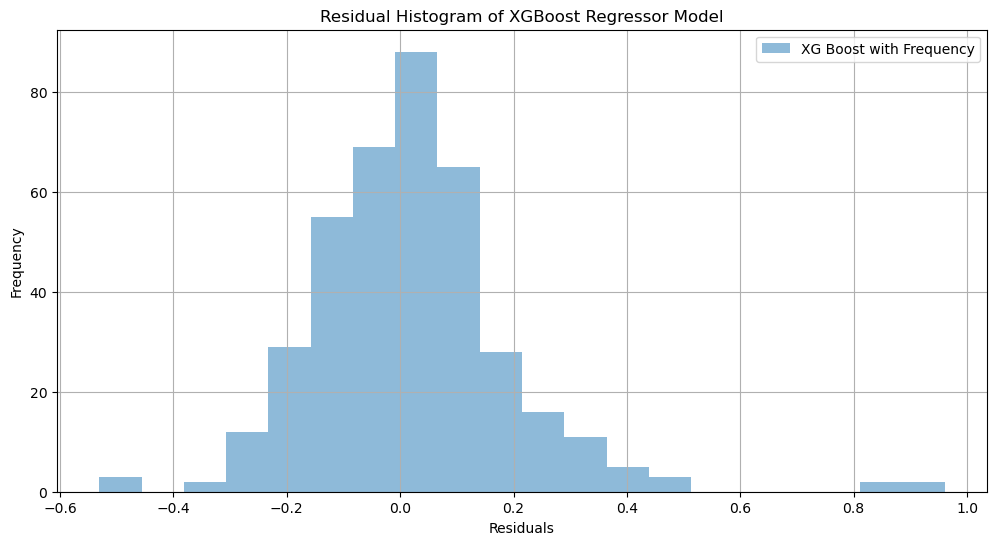

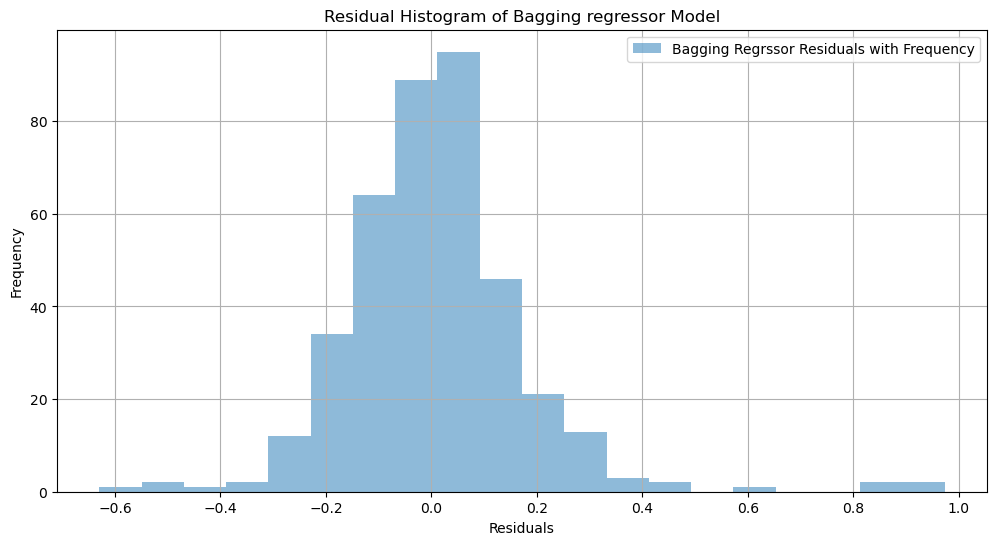

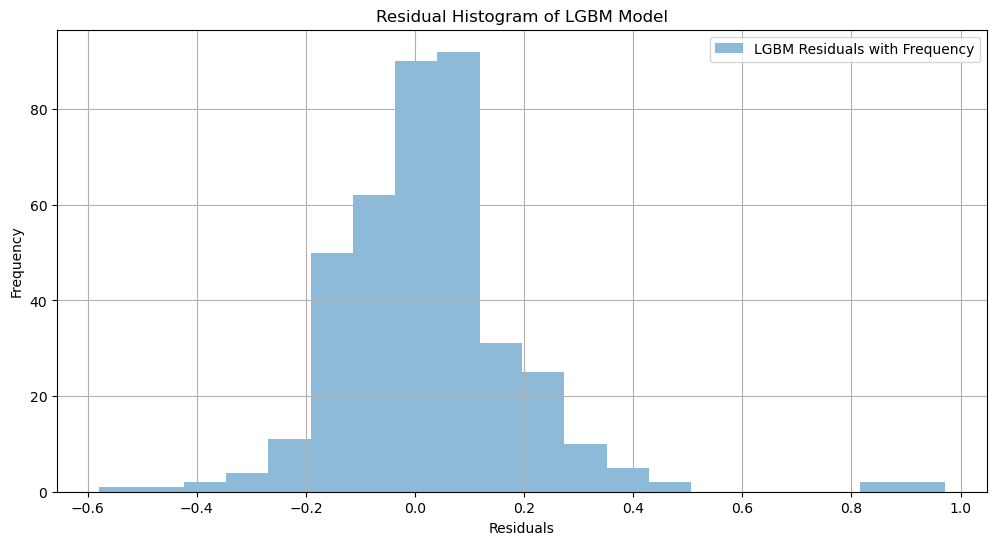

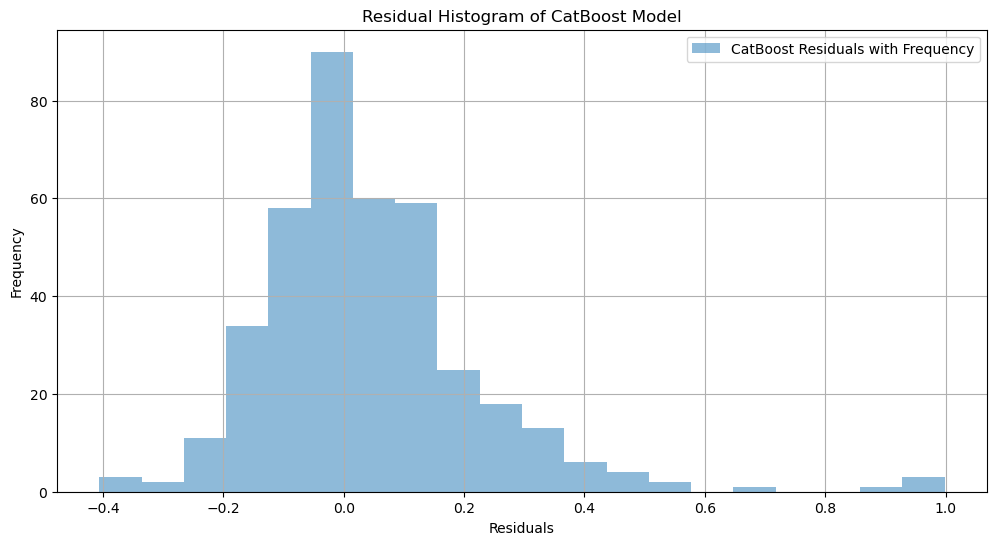

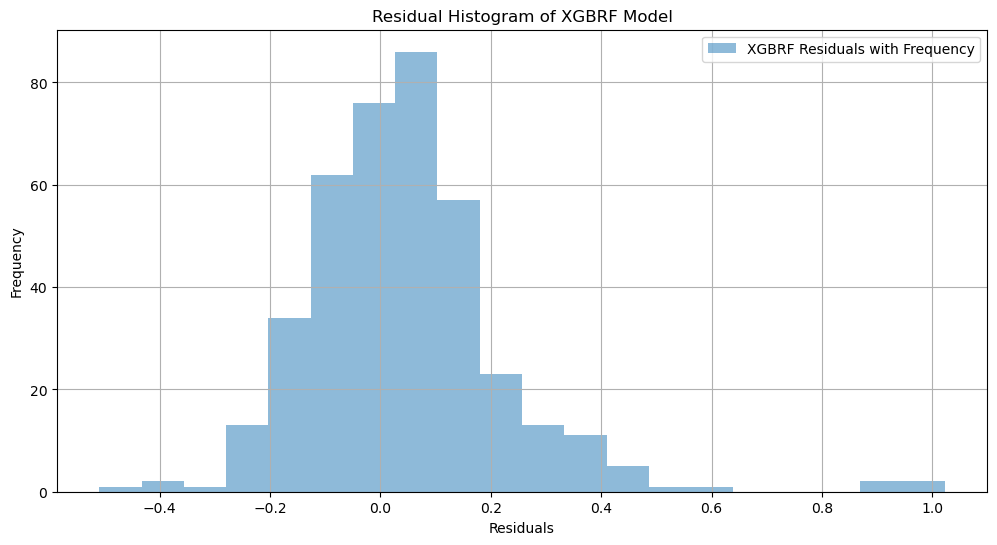

In [69]:

plt.figure(figsize=(12, 6))
plt.hist(y_test-y_pred, bins=20, alpha=0.5, label='Random forest regressor residulas Frequency')
plt.title('Residual Histogram of Randomforest Regressor Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.hist(y_test-y_pred_xgb, bins=20, alpha=0.5, label='XG Boost with Frequency')
plt.title('Residual Histogram of XGBoost Regressor Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.hist(y_test-y_pred_bgr, bins=20, alpha=0.5, label='Bagging Regrssor Residuals with Frequency')
plt.title('Residual Histogram of Bagging regressor Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.hist(y_test-y_pred_lgbm, bins=20, alpha=0.5, label='LGBM Residuals with Frequency')
plt.title('Residual Histogram of LGBM Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.hist(y_test-y_pred_catboost, bins=20, alpha=0.5, label='CatBoost Residuals with Frequency')
plt.title('Residual Histogram of CatBoost Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.hist(y_test-y_pred_xgbrf, bins=20, alpha=0.5, label='XGBRF Residuals with Frequency')
plt.title('Residual Histogram of XGBRF Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Score Calculation for training data

In [92]:
listt=[y_pred_train,y_pred_train_xgb,y_pred_train_bgr,y_pred_train_lgbm,y_pred_train_catboost,y_pred_train_xgbrf]
models_list=['Random Forest','XGBoost','BaggingRegressor','LGBMRegressor','CatBoostRegressor','XGBRFRegressor']
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("Model", "MSE", "RMSE", "R2", "MAE"))
for i in range(len(listt)):
    mse = round(mean_squared_error(y_train, listt[i]),4)
    rmse=round(np.sqrt(mse),4)
    r2=round(r2_score(y_train,listt[i]),4)
    mae=round(mean_absolute_error(y_train,listt[i]),4)
    print("{:<20} {:<10} {:<10} {:<10} {:<10}".format(models_list[i], mse, rmse, r2, mae))

Model                MSE        RMSE       R2         MAE       
Random Forest        0.0031     0.0557     0.9853     0.0383    
XGBoost              0.0043     0.0656     0.9795     0.0488    
BaggingRegressor     0.0033     0.0574     0.9844     0.0389    
LGBMRegressor        0.008      0.0894     0.9622     0.0614    
CatBoostRegressor    0.0073     0.0854     0.9656     0.0651    
XGBRFRegressor       0.0006     0.0245     0.9972     0.0177    


# Score Calculation for testing data

In [93]:
listt=[y_pred,y_pred_xgb,y_pred_bgr,y_pred_lgbm,y_pred_catboost,y_pred_xgbrf]
models_list=['Random Forest','XGBoost','BaggingRegressor','LGBMRegressor','CatBoostRegressor','XGBRFRegressor']
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("Model", "MSE", "RMSE", "R2", "MAE"))
for i in range(len(listt)):
    mse = round(mean_squared_error(y_test, listt[i]),4)
    rmse=round(np.sqrt(mse),4)
    r2=round(r2_score(y_test,listt[i]),4)
    mae=round(mean_absolute_error(y_test,listt[i]),4)
    print("{:<20} {:<10} {:<10} {:<10} {:<10}".format(models_list[i], mse, rmse, r2, mae))

Model                MSE        RMSE       R2         MAE       
Random Forest        0.0309     0.1758     0.8324     0.1206    
XGBoost              0.0315     0.1775     0.8294     0.1241    
BaggingRegressor     0.0296     0.172      0.8396     0.1174    
LGBMRegressor        0.0293     0.1712     0.8413     0.119     
CatBoostRegressor    0.0345     0.1857     0.8131     0.1277    
XGBRFRegressor       0.0406     0.2015     0.7798     0.1412    


# 5 Fold Validation

In [39]:
kf=KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [40]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)


In [41]:
for model_name,model in models.items():
    print(f"Model:{model_name}")
    mse_scores=[]
    R2_scores=[]
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test= X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
        model.fit(X_train,y_train)
        y_pred=randFor.predict(X_test)
        mse=mean_squared_error(y_test,y_pred)
        R2_score=model.score(X_test,y_test)
        mse_scores.append(mse)
        R2_scores.append(R2_score)

    print("Cross-Validation:\n Mean Squared Error Scores:", mse_scores)
    print("Mean MSE:", np.mean(mse_scores))
    print("R2 Scores:",R2_scores)
    print("Mean R-squared:", np.mean(R2_scores))
    print("***************")

Model:Random_Forest_Regressor
Cross-Validation:
 Mean Squared Error Scores: [0.10124026433257517, 0.018118801406106822, 0.0292342375498832, 0.024382241278479638, 0.03093197952637276]
Mean MSE: 0.04078150481868351
R2 Scores: [0.20041069537339729, 0.8927630664114573, 0.7539005829126598, 0.8769688524346458, 0.832378286872129]
Mean R-squared: 0.7112842968008578
***************
Model:XGBoost
Cross-Validation:
 Mean Squared Error Scores: [0.0022483172884234805, 0.0026232867556151094, 0.004048219771989975, 0.003573831337714448, 0.03093197952637276]
Mean MSE: 0.008685126936023154
R2 Scores: [0.3029441051337791, 0.8798228575446166, 0.7821798523666217, 0.8706454490421933, 0.8294072921203537]
Mean R-squared: 0.7329999112415129
***************
Model:Bagging_Regressor
Cross-Validation:
 Mean Squared Error Scores: [0.0022483172884234805, 0.0026232867556151094, 0.004048219771989975, 0.003573831337714448, 0.03093197952637276]
Mean MSE: 0.008685126936023154
R2 Scores: [0.21194069687494743, 0.8937617276

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

199:	learn: 0.0901837	total: 1.28s	remaining: 0us
0:	learn: 0.4319589	total: 8.25ms	remaining: 1.64s
100:	learn: 0.1183476	total: 627ms	remaining: 615ms
199:	learn: 0.0922329	total: 1.25s	remaining: 0us
0:	learn: 0.4184783	total: 8.14ms	remaining: 1.62s
100:	learn: 0.1145546	total: 633ms	remaining: 620ms
199:	learn: 0.0888792	total: 1.27s	remaining: 0us
0:	learn: 0.4226896	total: 7.39ms	remaining: 1.47s
100:	learn: 0.1120415	total: 607ms	remaining: 595ms
199:	learn: 0.0869269	total: 1.19s	remaining: 0us
0:	learn: 0.4305289	total: 7.32ms	remaining: 1.46s
100:	learn: 0.1134635	total: 618ms	remaining: 605ms
199:	learn: 0.0855337	total: 1.27s	remaining: 0us
Cross-Validation:
 Mean Squared Error Scores: [0.0022483172884234805, 0.0026232867556151094, 0.004048219771989975, 0.003573831337714448, 0.03093197952637276]
Mean MSE: 0.008685126936023154
R2 Scores: [0.24037876570446148, 0.8560116569771022, 0.7742472948590959, 0.8663958883736759, 0.8131388490142195]
Mean R-squared: 0.710034490985711
**